<a href="https://colab.research.google.com/github/Valeria-pavon/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Física", "Química", "Biología", "Educación Física", "Inglés", "Arte", "Música", "Ciudadanía"]

# Apellidos y nombres comunes (puedes expandir esta lista)
apellidos = ["Gómez", "Rodríguez", "Pérez", "García", "López", "Martínez", "Sánchez", "González", "Fernández", "Torres"]
nombres = ["Juan", "Pedro", "Maria", "Ana", "Sofia", "Luis", "Carlos", "Laura", "Diego", "Valentina"]


# Crear una lista de diccionarios para almacenar los datos de cada alumno
data = []

for _ in range(100):  # Generar 100 filas de datos
  nombre = random.choice(nombres)
  apellido = random.choice(apellidos)
  dni = random.randint(10000000, 99999999)  # DNI aleatorio (simplificado)
  materia = random.choice(materias)
  nota1 = random.randint(1,10)
  nota2 = random.randint(1,10)
  nota3 = random.randint(1,10)
  faltas = random.randint(0, 20)  # Número de faltas aleatorias

  data.append({
      "Apellido": apellido,
      "Nombre": nombre,
      "DNI": dni,
      "Materia": materia,
      "Nota 1er Trimestre": nota1,
      "Nota 2do Trimestre": nota2,
      "Nota 3er Trimestre": nota3,
      "Faltas a clases": faltas
  })

# Crear el DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print(df.head())

    Apellido     Nombre       DNI              Materia  Nota 1er Trimestre  \
0      López      Diego  12161255               Inglés                   4   
1     Torres      Sofia  72314501               Inglés                  10   
2  Rodríguez     Carlos  83559777            Geografía                   3   
3      Pérez  Valentina  89586738  Lengua y Literatura                   5   
4   González      Laura  82930734             Biología                   3   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   5                  10               14  
1                   8                   5               10  
2                   5                   7                6  
3                   7                   4               16  
4                   8                   4               17  


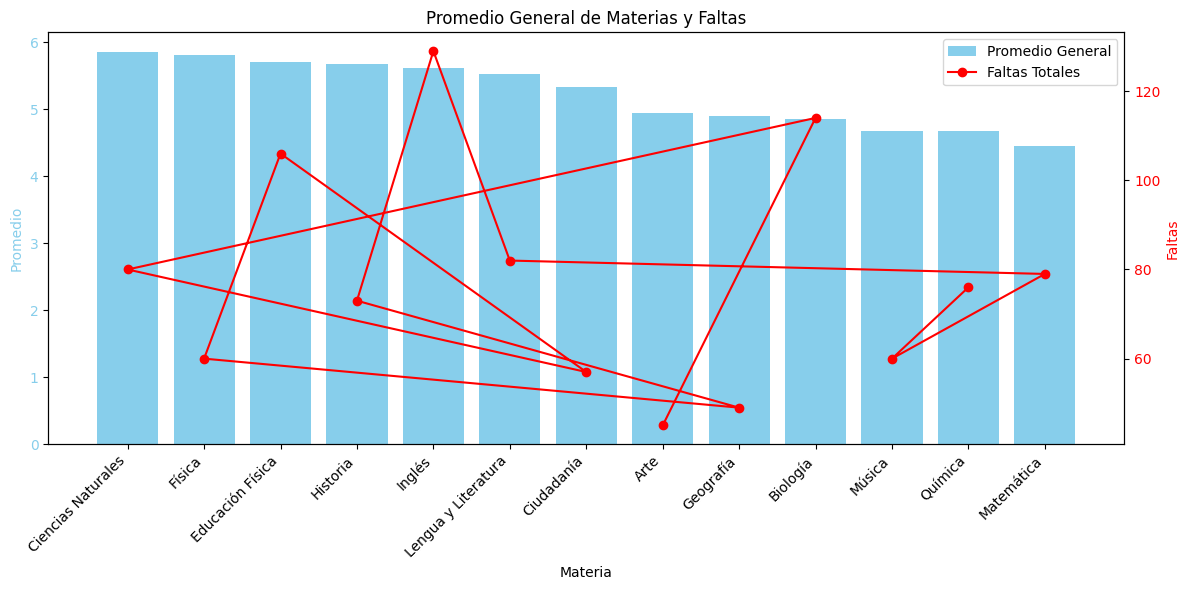

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular el total de faltas por materia
faltas_por_materia = df.groupby('Materia')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio de cada materia
ax1.bar(promedios_ordenados.index, promedios_ordenados.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas')
plt.xticks(rotation=45, ha='right')


# Segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, marker='o', color='red', label='Faltas Totales')
ax2.set_ylabel('Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Mostrar las leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)